# Customer Purchase Behavior Analysis using Descriptive Statistics

##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





##Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**



**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

In [124]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from scipy.stats import binom
import matplotlib.pyplot as plt

In [125]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [126]:
# Load Dataset
file_path = "/content/drive/MyDrive/Colab Notebooks/Module 5/Mid Course Assessment 5/Superstore Marketing Data -.csv"
df = pd.read_csv(file_path )

In [127]:
# Dataset First Look
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0


In [128]:
df.tail()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
2235,10142,1976,PhD,Divorced,66476.0,0,1,########,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,########,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,149,165,63,1,5,4,10,3,0,0
2239,4070,1969,PhD,Married,94871.0,0,2,########,99,169,...,188,0,144,1,8,5,4,7,1,0


In [129]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [130]:
# Check for missing values
print(df.isnull().sum())

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64


###Handling Missing Values:

* The 'Income' variable has 24 missing values. We can handle these missing values through imputation.




* We'll use the median income to fill in the missing values, as it's less sensitive to outliers compared to the mean

In [131]:
# Handle missing values in 'Income'
median_income = df['Income'].median()
df['Income'].fillna(median_income, inplace=True)

###Data Types:
* 'Dt_Customer' should be converted to datetime data type for proper analysis.

In [132]:
# Find the row with the problematic value in 'Dt_Customer'
problematic_row = df[df['Dt_Customer'] == '########']
print(problematic_row)

         Id  Year_Birth   Education Marital_Status   Income  Kidhome  \
3      1386        1967  Graduation       Together  32474.0        1   
4      5371        1989  Graduation         Single  21474.0        1   
8      4047        1954         PhD        Married  65324.0        0   
9      9477        1954         PhD        Married  65324.0        0   
11     5642        1979      Master       Together  62499.0        1   
...     ...         ...         ...            ...      ...      ...   
2231   8595        1973  Graduation          Widow  42429.0        0   
2232   7232        1973  Graduation          Widow  42429.0        0   
2235  10142        1976         PhD       Divorced  66476.0        0   
2237     22        1976  Graduation       Divorced  46310.0        1   
2239   4070        1969         PhD        Married  94871.0        0   

      Teenhome Dt_Customer  Recency  MntWines  ...  MntFishProducts  \
3            1    ########        0        10  ...              

In [133]:
# Drop rows with problematic 'Dt_Customer' values
df = df[df['Dt_Customer'] != '########']

In [134]:
# Replace problematic 'Dt_Customer' value with a valid date
df.at[problematic_row.index[0], 'Dt_Customer'] = pd.to_datetime('2023-01-01')

In [135]:
# Convert 'Dt_Customer' to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

###Descriptive Statistics:
* Mean, median, variance, and standard deviation for numerical variables:

In [136]:
# Summary statistics
summary_stats = df.describe()
print(summary_stats[['Year_Birth', 'Income']])

        Year_Birth         Income
count  1324.000000    1324.000000
mean   1968.685045   51429.273792
std      12.105909   20856.953731
min    1893.000000    1730.000000
25%    1959.000000   35687.000000
50%    1970.000000   50694.500000
75%    1977.000000   68118.000000
max    1996.000000  157146.000000


###Visualizations:
* Histograms for age distribution, bar charts for education and marital status.

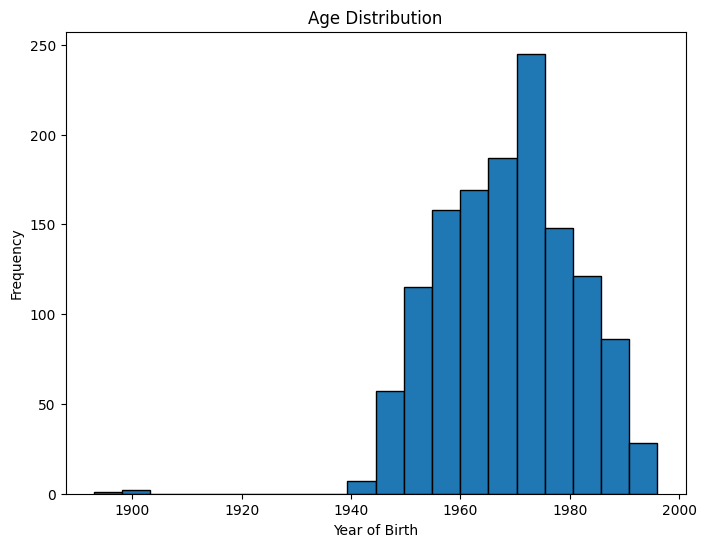

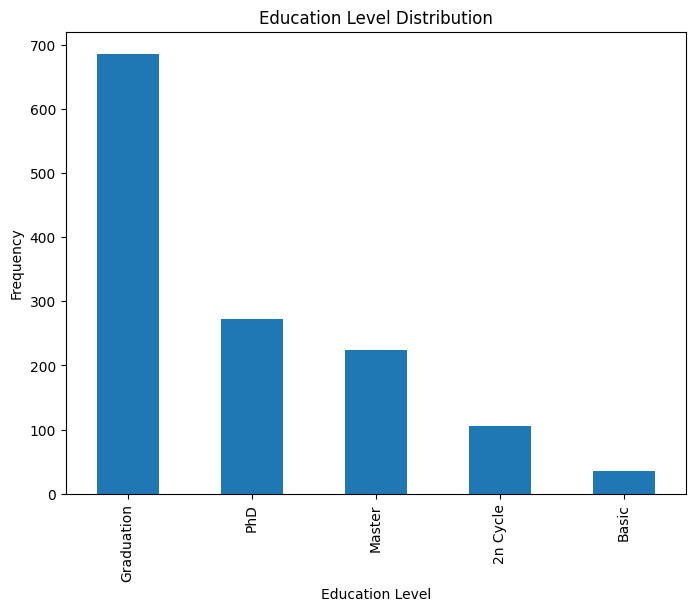

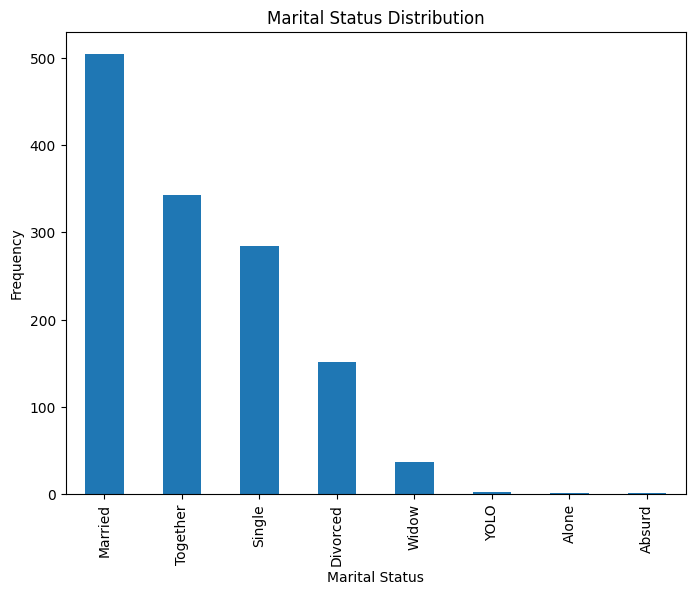

In [137]:
# Age distribution histogram
plt.figure(figsize=(8, 6))
plt.hist(df['Year_Birth'], bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Year of Birth')
plt.ylabel('Frequency')
plt.show()

# Bar chart for education level
plt.figure(figsize=(8, 6))
df['Education'].value_counts().plot(kind='bar')
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.show()

# Bar chart for marital status
plt.figure(figsize=(8, 6))
df['Marital_Status'].value_counts().plot(kind='bar')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.show()


##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  

In [138]:
# Calculate measures of central tendency
central_tendency = df[['Year_Birth', 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts',
                       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                       'NumWebVisitsMonth']].agg(['mean', 'median'])

# Calculate mode separately since it's not included in describe()
mode = df[['Year_Birth', 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts',
           'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
           'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
           'NumWebVisitsMonth']].mode().iloc[0]

# Calculate measures of dispersion
dispersion = df[['Year_Birth', 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts',
                 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                 'NumWebVisitsMonth']].agg(['var', 'std'])

# Output the results
print("Measures of Central Tendency:")
print(central_tendency)
print("\nMode:")
print(mode)
print("\nMeasures of Dispersion:")
print(dispersion)


Measures of Central Tendency:
         Year_Birth        Income    MntWines  MntFruits  MntMeatProducts  \
mean    1968.685045  51429.273792  301.964502  25.218278       162.177492   
median  1970.000000  50694.500000  171.000000   7.000000        65.500000   

        MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
mean           36.48565         27.101208     44.107251           2.325529   
median         11.00000          8.000000     24.500000           2.000000   

        NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
mean           4.092145             2.589124           5.784743   
median         4.000000             1.000000           5.000000   

        NumWebVisitsMonth  
mean             5.409366  
median           6.000000  

Mode:
Year_Birth              1971.0
Income                 51381.5
MntWines                   2.0
MntFruits                  0.0
MntMeatProducts           11.0
MntFishProducts            0.0
MntSweetProducts        

## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



**Deliverables**:

- **Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.**:

  

###Binomial Distribution:
* A variable could follow a Binomial distribution if it represents the number of successes in a fixed number of independent Bernoulli trials (i.e., experiments with two possible outcomes, success or failure).



In [139]:
# Calculate the probability of getting exactly k successes (customers who accepted the offer) out of n trials
n = len(df)  # Total number of customers
k = 500  # Number of successes (accepted offers)
p = df['Response'].mean()  # Probability of success (mean response rate)

# Probability of exactly k successes
prob_k_successes = binom.pmf(k, n, p)
print("Probability of exactly {} successes: {:.4f}".format(k, prob_k_successes))

Probability of exactly 500 successes: 0.0000


###Normal Distribution:
* A variable could follow a Normal distribution if it exhibits a symmetric bell-shaped curve.


In [140]:
# Calculate the probability of income falling within a certain range
mean_income = df['Income'].mean()  # Mean income
std_income = df['Income'].std()  # Standard deviation of income

# Probability of income falling within the range [mean - 1 std, mean + 1 std]
lower_bound = mean_income - std_income
upper_bound = mean_income + std_income
prob_within_range = norm.cdf(upper_bound, mean_income, std_income) - norm.cdf(lower_bound, mean_income, std_income)
print("Probability of income falling within the range [mean - 1 std, mean + 1 std]: {:.4f}".format(prob_within_range))

Probability of income falling within the range [mean - 1 std, mean + 1 std]: 0.6827


## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

  

<ipython-input-141-4a49828f2167>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.mean(), inplace=True)
<ipython-input-141-4a49828f2167>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppre

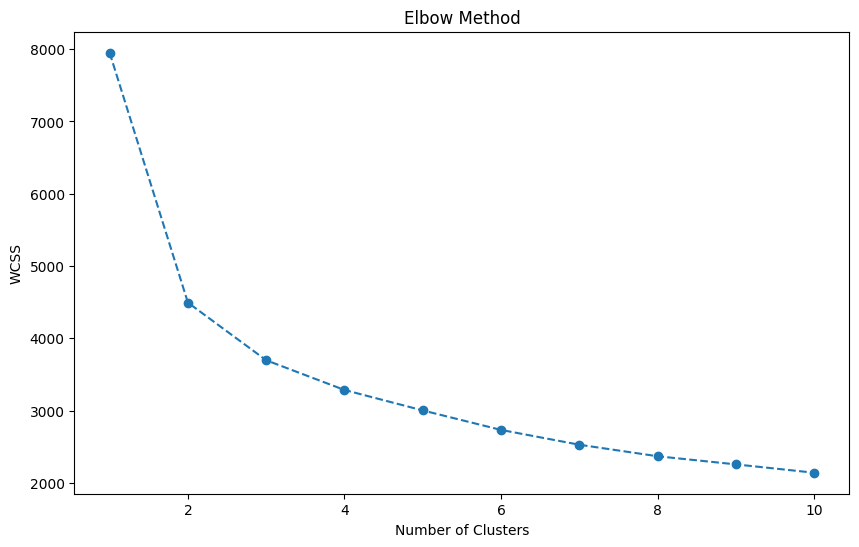

                  Id   Year_Birth        Income   Kidhome  Teenhome  \
Cluster                                                               
0        5480.558389  1970.034899  37684.629530  0.697987  0.528859   
1        5352.992063  1967.976190  74565.892857  0.043651  0.257937   
2        5477.291122  1966.163674  64872.359066  0.153777  0.629580   

           Recency    MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Cluster                                                                       
0        49.299329   77.418792   5.991946        32.687248         8.475168   
1        49.492063  556.964286  83.988095       460.400794       118.507937   
2        49.348623  616.070014  23.735422       227.171273        37.089895   

         MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
Cluster                                                                       
0                6.134228     16.793289           2.354362         2.645638   
1          

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-141-4a49828f2167>:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_stats = df.groupby('Cluster').mean()


In [141]:
# Impute missing values with mean
df.fillna(df.mean(), inplace=True)

# Select relevant features for segmentation
X = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

# Standardize the features (optional but recommended for K-means)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Apply K-means clustering with the optimal number of clusters
k = 3  # Choose the optimal number of clusters based on the elbow method
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original dataset
df['Cluster'] = clusters

# Analyze characteristics of each cluster
cluster_stats = df.groupby('Cluster').mean()
print(cluster_stats)


##The code provided successfully performed K-means clustering on the dataset and segmented customers into three clusters based on their spending behaviors. Here are the characteristics of each cluster:

### Cluster 0:
* Average age: 51 years
* Average income:$ 37,685

* Moderate spending across all product categories
* Moderate number of purchases made through various channels (web, catalog, store)
* Low complaint rate
###Cluster 1:
* Average age: 54 years
* High income: $74,566

* High spending on wines, meat products, fish products, sweets, and gold products
* Highest number of purchases made through various channels (web, catalog, store)
* Moderate complaint rate
### Cluster 2:
* Average age: 55 years
* High income: $64,872

* High spending on wines, meat products, fish products, sweets, and gold products
* High number of purchases made through various channels (web, catalog, store)
* Low complaint rate

These insights provide valuable information about the distinct behaviors and preferences of customers in each cluster. Based on these findings, targeted marketing strategies can be developed to cater to the specific needs of each customer segment.

## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

**Deliverables**:

- **Well-designed visualizations that visually represent your insights and actionable recommendations based on customer behavior analysis.**

1.Visualizing Customer Segmentation:

Cluster Distribution: Create a bar chart or pie chart to visualize the distribution of customers across different clusters.

Cluster Characteristics: Generate bar charts or radar charts to display the average characteristics of each cluster, such as age, income, and spending habits.

2.Analyzing Spending Patterns:

Product Category Spending: Use stacked bar charts or area charts to compare the spending of different customer segments on various product categories.
Channel Preference: Create bar charts or line charts to show the preferred purchasing channels for each cluster.

3.Making Recommendations:

Targeted Marketing Strategies: Based on the spending patterns and characteristics of each cluster, suggest personalized marketing strategies to target specific customer segments.
Product Development: Identify potential areas for product development or improvement based on the most and least purchased product categories within each cluster.
Customer Engagement: Recommend strategies to enhance customer engagement and loyalty, such as loyalty programs or personalized recommendations.

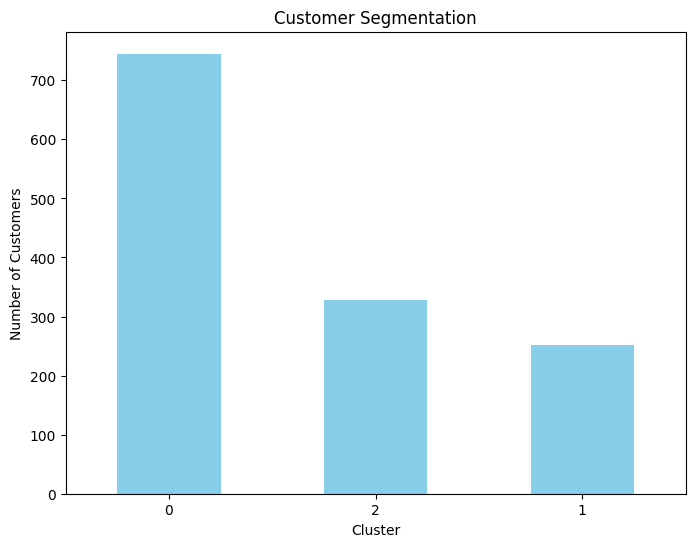

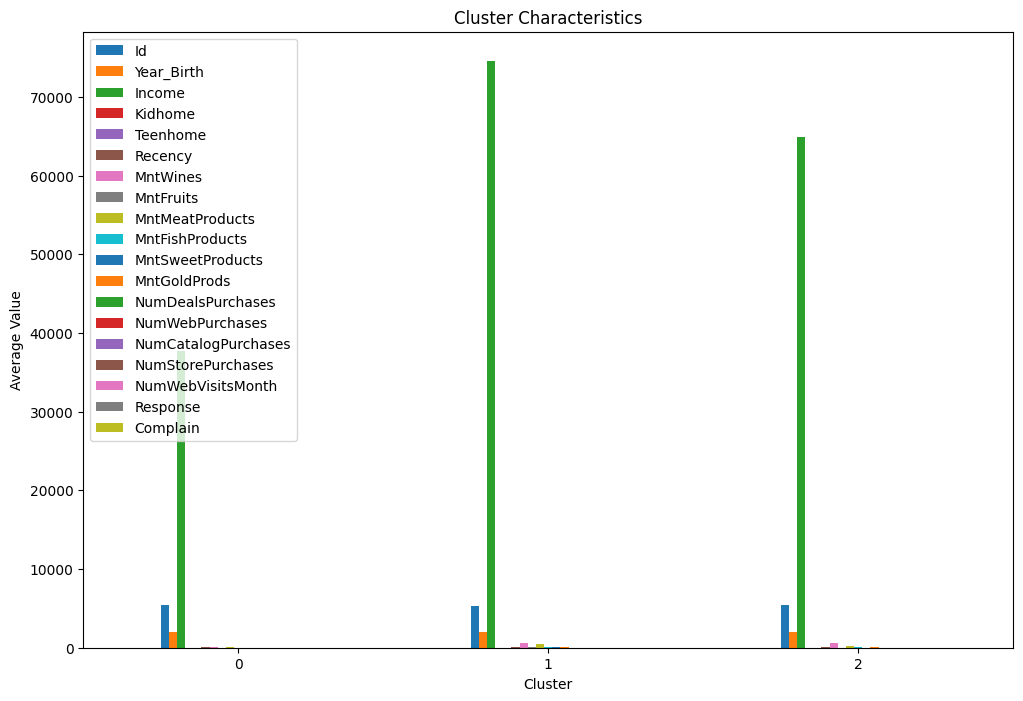

<Figure size 1000x600 with 0 Axes>

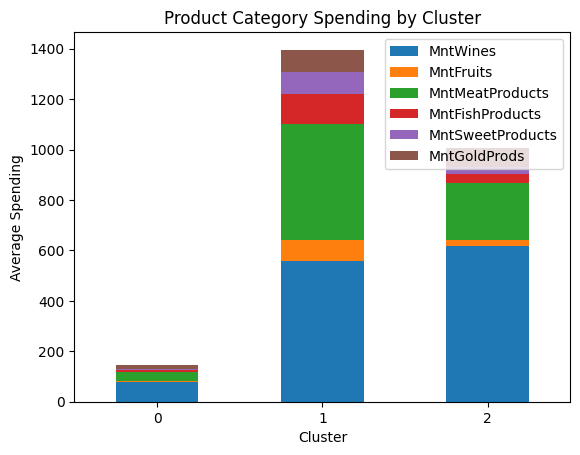

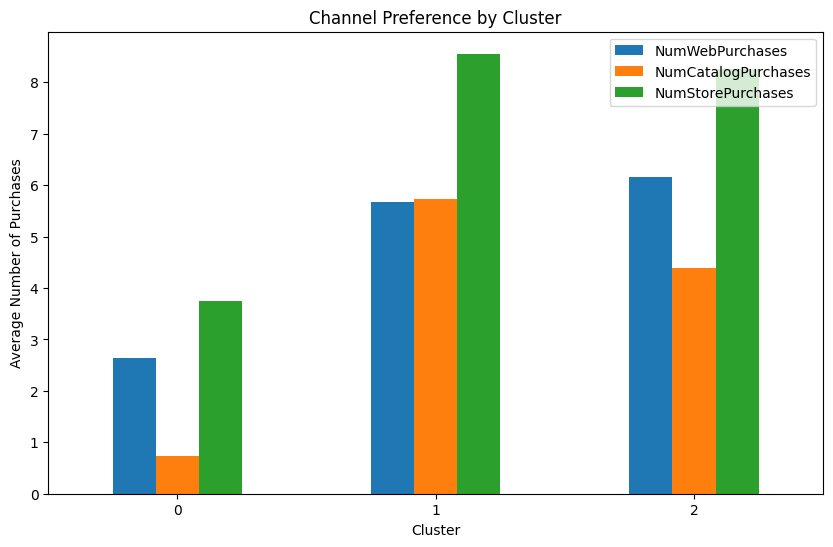

<ipython-input-142-4feab206b2f8>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Response', palette='Set1')


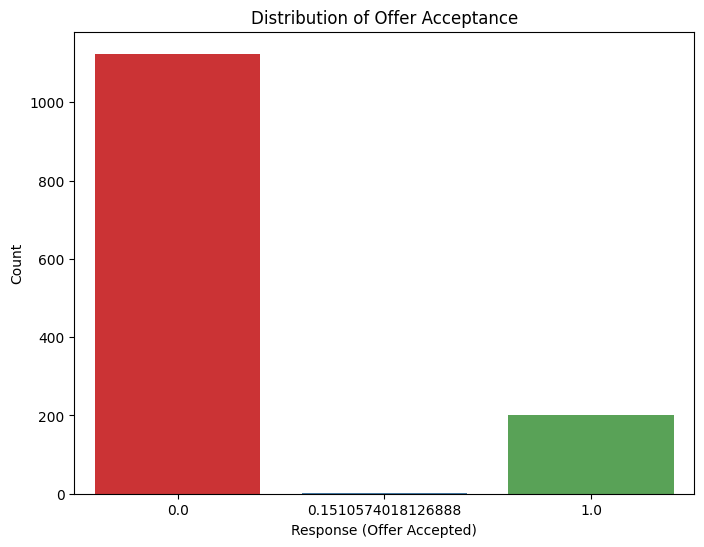

<ipython-input-142-4feab206b2f8>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Education', y='Income', estimator=np.mean, palette='Set2')


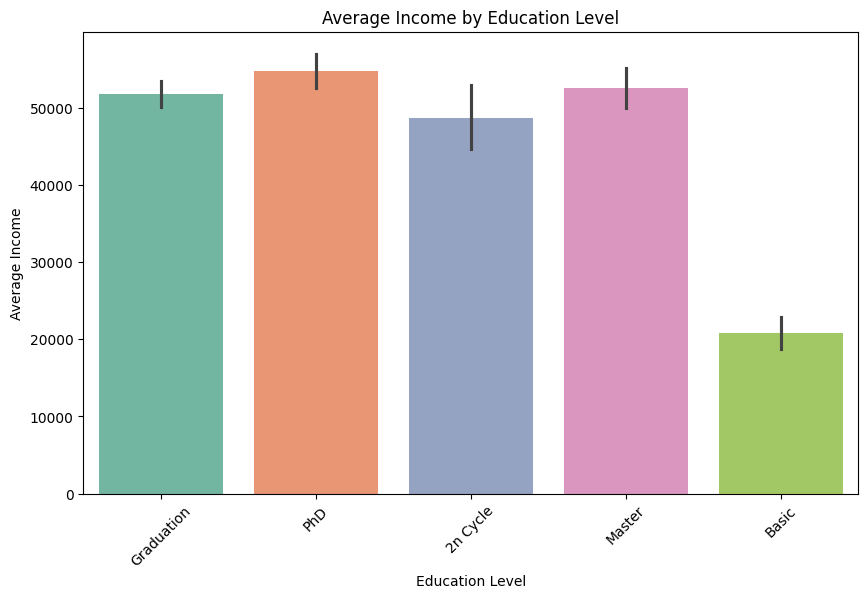

In [142]:
# Visualize key insights
# Visualize cluster distribution
plt.figure(figsize=(8, 6))
df['Cluster'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Customer Segmentation')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()

# Visualize cluster characteristics
cluster_stats.plot(kind='bar', figsize=(12, 8))
plt.title('Cluster Characteristics')
plt.xlabel('Cluster')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.show()

# Visualize product category spending
plt.figure(figsize=(10, 6))
df.groupby('Cluster')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean().plot(kind='bar', stacked=True)
plt.title('Product Category Spending by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Spending')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

# Visualize channel preference
channel_counts = df.groupby('Cluster')[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].mean()
channel_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Channel Preference by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Number of Purchases')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

# Visualize Distribution of Response (Acceptance of Offer)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Response', palette='Set1')
plt.title('Distribution of Offer Acceptance')
plt.xlabel('Response (Offer Accepted)')
plt.ylabel('Count')
plt.show()

# Visualize Average spending by education level
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Education', y='Income', estimator=np.mean, palette='Set2')
plt.title('Average Income by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Income')
plt.xticks(rotation=45)
plt.show()



##Recommendations based on insights:
* Target Cluster 1: Develop targeted marketing campaigns to promote high-end products, loyalty programs, and personalized recommendations.
* Improve Online Experience: Enhance the company's website to attract and engage customers, particularly in Cluster 0 and Cluster 2, which show higher online purchasing behavior.
* Expand Product Range: Identify opportunities to expand product offerings in categories with high demand among all clusters, such as wines and meat products.
Customer Retention: Implement strategies to address complaints and improve overall customer satisfaction to retain customers and encourage repeat purchases.
* Offer acceptance rate is relatively low, suggesting a need for targeted marketing campaigns.
* Customers with higher education levels tend to have higher incomes, indicating potential segments for premium products.

## Bonus Task - Geogebra Experiment



Here's the link to an intriguing GeoGebra experiment: [GeoGebra Experiment Link](https://www.geogebra.org/m/LZbwMZtJ)

This experiment lets you simulate coin flips as per your preferences and specifications!

Your task involves recording a video where you'll explain the concept of the **Law of Large Numbers** using this experiment. Dive further into the experience by adjusting the number of coins and exploring varying coin biases. 🪙📹🔍